In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
X,y=load_iris(return_X_y=True)

In [3]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [4]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Input,concatenate
from tensorflow.keras.utils import plot_model

f:\aiml2\.venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
f:\aiml2\.venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
f:\aiml2\.venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  war

In [5]:
LEARNING_RATE=0.01
EPOCHS=30
BATCH_SIZE=32

In [6]:
X_input=Input(shape=(4,))
X_dense1=Dense(10,activation='relu')(X_input)
X_dense2=Dense(20,activation='relu')(X_dense1)
X_output=Dense(3,activation='softmax')(X_dense2)
model= Model(inputs=X_input,outputs=X_output)

In [14]:
X_input=Input(shape=(4,))
X_dense1=Dense(10,activation='relu')(X_input)
X_dense2=Dense(10,activation='relu')(X_input)

merged= concatenate([X_dense1,X_dense2])
X_dense3=Dense(30,activation='relu')(merged)
X_output=Dense(3,activation='softmax')(X_dense3)
model1=Model(inputs=X_input,outputs=X_output)

In [15]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='sparse_categorical_crossentropy')

In [16]:
hist=model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9732 - loss: 0.1237 - val_accuracy: 0.9737 - val_loss: 0.1095
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9732 - loss: 0.1177 - val_accuracy: 0.9474 - val_loss: 0.1123
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9643 - loss: 0.1177 - val_accuracy: 0.9474 - val_loss: 0.1130
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9643 - loss: 0.1177 - val_accuracy: 0.9474 - val_loss: 0.1107
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9643 - loss: 0.1153 - val_accuracy: 0.9737 - val_loss: 0.1075
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9732 - loss: 0.1132 - val_accuracy: 0.9737 - val_loss: 0.1058
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9821 - loss: 0.1122 - val_accuracy: 0.9737 - val_loss: 0.1052
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9732 - loss: 0.1118 - val_accuracy: 0.9474 - val_loss:

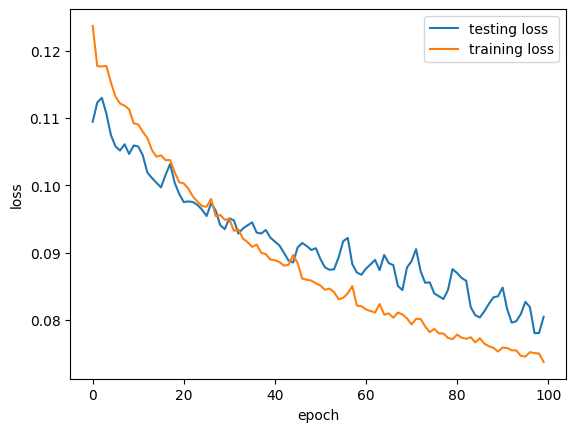

In [17]:
import matplotlib.pyplot as plt

plt.plot(hist.history['val_loss'],label='testing loss')
plt.plot(hist.history['loss'],label='training loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()